In [1]:
import random
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [2]:
def norm(data):
    minVal = data.min(0)
    maxVal = data.max(0)
    diff = maxVal - minVal
    normData = np.zeros(np.shape(data))
    n = data.shape[0]
    normData = data - np.tile(minVal, (n,1))
    normData = normData/np.tile(diff,(n,1))
    return normData

In [3]:
def classify(inX,dataset,labels,k):
    data_size = dataset.shape[0]
    DiffMat = np.tile(inX,(data_size,1))-dataset
    sqDiffMat = DiffMat**2
    dis = sqDiffMat.sum(axis=1)**0.5
    # 计算距离
    sorted_dis = dis.argsort()
    classcount = {}
    for i in range(k):
        vote = labels[sorted_dis[i]]
        classcount[vote] = classcount.get(vote,0)+1
    sortedCount = sorted(classcount.items(),key = operator.itemgetter(1),reverse=True)
    return sortedCount[0][0]

In [4]:
def k_fold(n,n_fold):
    index = np.arange(n)
    fold_sizes = (n // n_fold) * np.ones(n_fold,dtype=np.int)
    fold_sizes[:n % n_fold] += 1
    current = 0
    for fold_size in fold_sizes:
        start = current
        stop = current + fold_size
        train_index = list(np.concatenate((index[:start],index[stop:])))
        test_index = list(index[start:stop])
        yield train_index,test_index
        current = stop

In [5]:
def validate(X,y,n_folds,kn):
    error = 0.0
    kf = k_fold(len(y),n_folds)
    for train_index,test_index in kf:
        X_train,X_test = X[train_index], X[test_index]
        y_train,y_test = y[train_index], y[test_index]
        temp_error = 0.0
        for i in range(len(y_test)):
            temp = classify(X_train,y_train,X_test[i],kn)
            temp_error = temp_error +(y_test[i]-temp)**2
        error = error + temp_error/len(y_test)
    return error/n_folds

In [6]:
def test_alg(x_train,x_test,y_train,y_test,kn):
    error = 0.0
    for i in range (len(y_test)):
        guess = classify(x_test[i],x_train,y_train,kn)
        error = error + (y_test[i]-guess)**2
    return error/len(y_test)

In [7]:
def validate(X,y,n_folds,kn):
    error = 0.0
    kf = k_fold(len(y),n_folds)
    for train_index,test_index in kf:
        X_train,X_test = X[train_index], X[test_index]
        y_train,y_test = y[train_index], y[test_index]
        error = error + test_alg(X_train,X_test,y_train,y_test,kn)
    return error/n_folds

In [8]:
iris = load_iris()
n = iris.data.shape[0]
index = [i for i in range(n)]
random.shuffle(index) # 打乱index
iris.data = iris.data[index]
iris.target = iris.target[index]
X = iris.data
Y = iris.target
norm_X = norm(X)

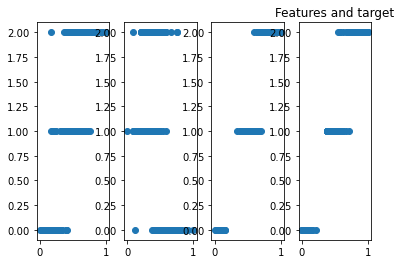

In [16]:
fig = plt.figure()
ax = fig.add_subplot(141)
ax.scatter(norm_X[:,0], Y)
ax = fig.add_subplot(142)
ax.scatter(norm_X[:,1],Y)
ax = fig.add_subplot(143)
ax.scatter(norm_X[:,2],Y)
ax = fig.add_subplot(144)
ax.scatter(norm_X[:,3],Y)
plt.title('Features and target')
plt.show()

In [11]:
errors = []
min = 1
for i in range(50):
    error1 = validate(iris.data,iris.target,n_folds = 100,kn = i+1)
    errors.append(error1)
    if error1 < min:
        min = error1
        K = i

C:\Users\12549\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


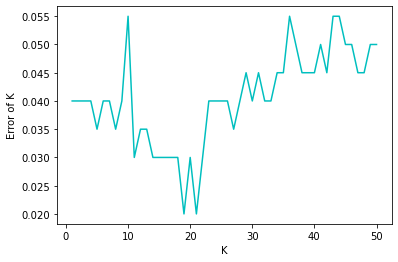

In [12]:
xs = np.arange(len(errors)) + 1
plt.plot(xs,errors,color = 'c')
plt.xlabel('K')
plt.ylabel('Error of K')
plt.show() 

In [14]:
test_size = 40
x_train = norm_X[test_size:]
x_test = norm_X[:test_size]
y_train = Y[test_size:]
y_test = Y[:test_size]
predictions = []
correct = 0
for i in range(x_test.shape[0]):
    predictions.append(classify(x_test[i],x_train,y_train,K))
    if predictions[i] == y_test[i]:
        correct += 1
# 计算准确率
accuracy = correct / x_test.shape[0]

In [15]:
accuracy

0.975

##### 交叉验证法代码参考来源：https://blog.csdn.net/u010967162/article/details/52269077